# Importaciones


In [8]:
import numpy as np  # Para operaciones numéricas y generación de datos aleatorios
import pandas as pd  # Para manipulación y análisis de datos
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.model_selection import (
    train_test_split,
)  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Para regresión lineal
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
)  # Para evaluar el rendimiento del modelo


# Creación de un conjunto de datos realista


In [9]:
# Creamos un dataframe con datos sintéticos de viviendas
np.random.seed(42)  # Para reproducibilidad
n = 200  # Número de muestras
tamaño = np.random.uniform(50, 200, n)  # Tamaño de la vivienda (entre 50 y 200 m2)
# Edad de la vivienda (entre 0 y 40 años)
edad = np.random.uniform(0, 40, n)
# Número de habitaciones (entre 1 y 5)
habitaciones = np.random.randint(1, 6, n)
precio = (
    100000
    + 1000 * tamaño
    + 20000 * habitaciones
    - 2000 * edad
    + np.random.normal(0, 15000, n)
)


# Crear el DataFrame


In [10]:
# Creamos el DataFrame
datos_viviendas = pd.DataFrame(
    {"tamaño": tamaño, "edad": edad, "habitaciones": habitaciones, "precio": precio}
)


# Crea un DataFrame de pandas con las cuatro columnas generadas.


In [11]:
# Mostramos las primeras filas
print(datos_viviendas.head())


       tamaño       edad  habitaciones         precio
0  106.181018  25.681266             1  122645.947930
1  192.607146   3.365599             1  301852.002833
2  159.799091   6.465149             1  259100.110307
3  139.798773  35.942168             4  261306.818012
4   73.402796  24.257162             1  136439.592122


In [12]:
# Visualizamos las relaciones entre variables
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

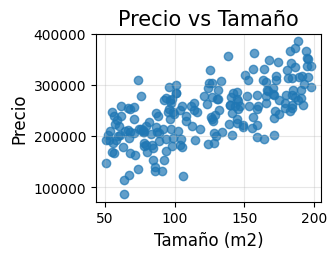

In [14]:
# Relación entre tamaño y precio
plt.subplot(2, 2, 1)
plt.scatter(datos_viviendas["tamaño"], datos_viviendas["precio"], alpha=0.7)
plt.title("Precio vs Tamaño", fontsize=15)
plt.xlabel("Tamaño (m2)", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.grid(True, alpha=0.3)


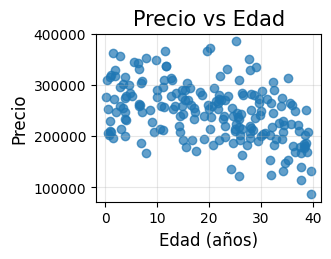

In [15]:
# Relación entre edad y precio
plt.subplot(2, 2, 2)
plt.scatter(datos_viviendas["edad"], datos_viviendas["precio"], alpha=0.7)
plt.title("Precio vs Edad", fontsize=15)
plt.xlabel("Edad (años)", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.grid(True, alpha=0.3)


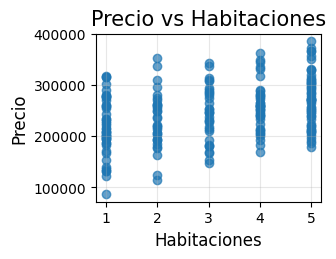

In [16]:
# Relación entre habitaciones y precio
plt.subplot(2, 2, 3)
plt.scatter(datos_viviendas["habitaciones"], datos_viviendas["precio"], alpha=0.7)
plt.title("Precio vs Habitaciones", fontsize=15)
plt.xlabel("Habitaciones", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.grid(True, alpha=0.3)


Text(0.5, 1.0, 'Matriz de Correlación')

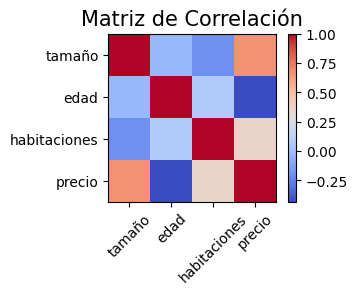

In [17]:
# Matriz de correlación
plt.subplot(2, 2, 4)
correlacion = datos_viviendas.corr()
plt.imshow(correlacion, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=45)
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
plt.title("Matriz de Correlación", fontsize=15)


In [18]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [19]:
print("\nMatriz de Correlación:")
print(correlacion)



Matriz de Correlación:
                tamaño      edad  habitaciones    precio
tamaño        1.000000 -0.026887     -0.198281  0.669119
edad         -0.026887  1.000000      0.076595 -0.430881
habitaciones -0.198281  0.076595      1.000000  0.359875
precio        0.669119 -0.430881      0.359875  1.000000


In [20]:
# Regresión lineal simple con tamaño
x = datos_viviendas[["tamaño"]].values
y = datos_viviendas["precio"].values


In [21]:
# Dividimos los datos
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [22]:
# Creamos y entrenamos el modelo
modelo_simple = LinearRegression()
modelo_simple.fit(x_train, y_train)


LinearRegression()

In [23]:
# Coeficientes
print(f"Intercepto: {modelo_simple.intercept_:.2f}")
print(f"Pendiente (tamaño): {modelo_simple.coef_[0]:.2f}")


Intercepto: 146535.37
Pendiente (tamaño): 813.26


In [25]:
# Hacemos predicciones
y_pred_simple = modelo_simple.predict(x_test)


In [26]:
# Evaluamos el modelo
print(f"R²: {r2_score(y_test, y_pred_simple):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_simple)):.2f}")


R²: 0.5329
RMSE: 40382.91


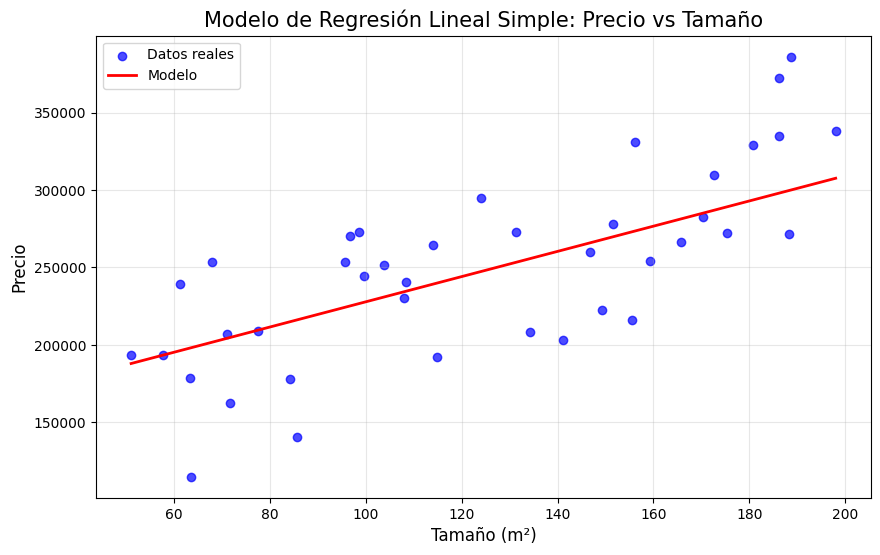

In [28]:
# Visualizamos el modelo
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color="blue", alpha=0.7, label="Datos reales")
plt.plot(
    [x_test.min(), x_test.max()],
    [modelo_simple.predict([[x_test.min()]]), modelo_simple.predict([[x_test.max()]])],
    color="red",
    linewidth=2,
    label="Modelo",
)
plt.title("Modelo de Regresión Lineal Simple: Precio vs Tamaño", fontsize=15)
plt.xlabel("Tamaño (m²)", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
